<a href="https://colab.research.google.com/github/vishnu9358862212/Data-visualization-/blob/main/collageofimages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnuchoudhary2212","key":"01ac28218ad8aebe43429379beb95de5"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!pip install kaggle


In [4]:
!kaggle datasets download alsaniipe/flowerdatasets

Dataset URL: https://www.kaggle.com/datasets/alsaniipe/flowerdatasets
License(s): apache-2.0
  0% 0.00/57.8M [00:00<?, ?B/s]
100% 57.8M/57.8M [00:00<00:00, 1.84GB/s]


In [5]:
import zipfile
import os

zip_file_path = '/content/flowerdatasets.zip'
extraction_path = '/content/flowers' # Specify the directory to extract to

# Create the extraction directory if it doesn't exist
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Dataset unzipped to {extraction_path}")

Dataset unzipped to /content/flowers


In [6]:
import os
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt


image_directory = 'flowers'

loaded_images = []
image_files = []

# Walk through the directory to find image files
for root, dirs, files in os.walk(image_directory):
    for file in files:
        # Check if the file is an image and is not in sample_data or dummy_images directories
        if file.lower().endswith(('.png', '.jpg', '.jpeg')) and 'sample_data' not in root and 'dummy_images' not in root:
            image_files.append(os.path.join(root, file))

# Limit the number of images to load to avoid memory issues, e.g., first 100
max_images_to_load = 100
image_files_subset = image_files[:max_images_to_load]


for image_file in image_files_subset:
    try:
        img = mpimg.imread(image_file)
        loaded_images.append(img)
    except Exception as e:
        print(f"Error loading image {image_file}: {e}")


print(f"Loaded {len(loaded_images)} images.")

Loaded 100 images.


In [7]:
image_dimensions = []
for img in loaded_images:
    height, width = img.shape[:2] # Get only height and width, ignore channels
    image_dimensions.append((width, height))

print(image_dimensions)

[(500, 561), (499, 614), (500, 557), (500, 514), (500, 500), (595, 500), (500, 750), (500, 750), (499, 616), (611, 500), (543, 500), (524, 500), (500, 556), (595, 499), (610, 500), (666, 500), (575, 499), (500, 552), (525, 500), (500, 566), (665, 500), (500, 529), (530, 500), (751, 500), (648, 500), (719, 500), (546, 500), (666, 500), (642, 500), (589, 500), (578, 500), (500, 607), (668, 500), (500, 736), (563, 500), (739, 500), (665, 500), (666, 500), (576, 500), (500, 600), (666, 500), (766, 500), (500, 542), (500, 574), (666, 500), (535, 500), (500, 500), (500, 557), (517, 499), (526, 500), (689, 500), (666, 500), (668, 500), (666, 500), (770, 500), (666, 500), (611, 500), (644, 500), (666, 500), (666, 500), (671, 500), (518, 500), (540, 500), (625, 500), (634, 500), (625, 500), (750, 500), (675, 500), (571, 500), (560, 500), (520, 500), (666, 500), (750, 500), (749, 500), (500, 666), (625, 500), (500, 718), (500, 605), (500, 502), (500, 608), (500, 524), (684, 500), (499, 705), (50

/tmp/ipython-input-699959204.py:153: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  final_collage_image_2 = Image.fromarray(final_collage_array_2, 'RGB')


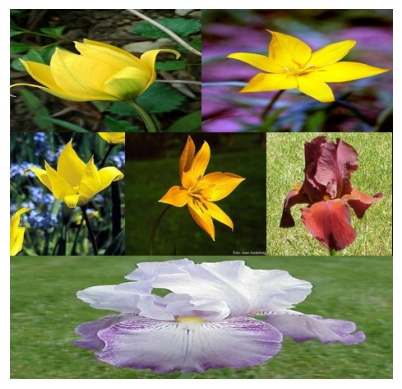

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to create a sub-collage with images stretched to fill the width
def create_sub_collage(resized_images, grid_rows, grid_cols, target_total_width, target_height):
    if not resized_images:
        return np.zeros((0, 0, 3), dtype=np.uint8)

    img_channels = resized_images[0].shape[2]

    collage_array_rows = []

    image_index = 0
    for row in range(grid_rows):
        row_images = resized_images[image_index : image_index + grid_cols]
        if not row_images:
            break

        # Calculate the sum of the *original* widths of the images in the current row
        # We need the original widths to determine the stretching factor for each image
        original_widths_in_row = [Image.fromarray(img_array.astype('uint8')).width for img_array in row_images]
        sum_original_widths = sum(original_widths_in_row)


        # Create a canvas for the current row with the target_total_width
        row_array = np.zeros((target_height, target_total_width, img_channels), dtype=np.uint8)

        current_x_offset = 0
        for i, img in enumerate(row_images):
            # Calculate the target width for the current image, maintaining aspect ratio relative to original widths
            # Stretch proportionally to fill the target_total_width
            target_width_img = int((original_widths_in_row[i] / sum_original_widths) * target_total_width)

            img_pil = Image.fromarray(img.astype('uint8'))
            # Resize the image to the target width and height
            img_resized = img_pil.resize((target_width_img, target_height))
            img_np = np.array(img_resized)


            h, w, c = img_np.shape
            # Place the stretched image into the row array
            row_array[:h, current_x_offset:current_x_offset + w] = img_np
            current_x_offset += w

        collage_array_rows.append(row_array)
        image_index += grid_cols

    # Vertically stack the row arrays
    if collage_array_rows:
        final_sub_collage = np.vstack(collage_array_rows)
        return final_sub_collage
    else:
        return np.zeros((0, 0, 3), dtype=np.uint8)


# Create another collage using a different set of images (e.g., images 6 to 11)
selected_images_2 = loaded_images[6:12]

part1_images_2 = selected_images_2[:2]
part2_images_2 = selected_images_2[2:5]
part3_images_2 = selected_images_2[5:]

num_images_part1_2 = len(part1_images_2)
num_images_part2_2 = len(part2_images_2)
num_images_part3_2 = len(part3_images_2)

grid_rows_part1_2 = 1
grid_cols_part1_2 = num_images_part1_2

grid_rows_part2_2 = 1
grid_cols_part2_2 = num_images_part2_2

grid_rows_part3_2 = 1
grid_cols_part3_2 = num_images_part3_2

target_height_2 = 150 # Keep the same target height for consistency

# Calculate the total width of images in each part after resizing to the new target_height
total_width_part1_2 = sum(Image.fromarray(img_array.astype('uint8')).resize((int(target_height_2 * (Image.fromarray(img_array.astype('uint8')).width / Image.fromarray(img_array.astype('uint8')).height)), target_height_2)).width for img_array in part1_images_2)
total_width_part2_2 = sum(Image.fromarray(img_array.astype('uint8')).resize((int(target_height_2 * (Image.fromarray(img_array.astype('uint8')).width / Image.fromarray(img_array.astype('uint8')).height)), target_height_2)).width for img_array in part2_images_2)
total_width_part3_2 = sum(Image.fromarray(img_array.astype('uint8')).resize((int(target_height_2 * (Image.fromarray(img_array.astype('uint8')).width / Image.fromarray(img_array.astype('uint8')).height)), target_height_2)).width for img_array in part3_images_2)

# Determine the maximum width among the three parts
max_collage_width_2 = max(total_width_part1_2, total_width_part2_2, total_width_part3_2)


resized_part1_images_2 = []
for img_array in part1_images_2:
    img_pil = Image.fromarray(img_array.astype('uint8'))
    aspect_ratio = img_pil.width / img_pil.height
    target_width_maintain_aspect = int(target_height_2 * aspect_ratio)
    img_resized = img_pil.resize((target_width_maintain_aspect, target_height_2))
    resized_part1_images_2.append(np.array(img_resized))

resized_part2_images_2 = []
for img_array in part2_images_2:
    img_pil = Image.fromarray(img_array.astype('uint8'))
    aspect_ratio = img_pil.width / img_pil.height
    target_width_maintain_aspect = int(target_height_2 * aspect_ratio)
    img_resized = img_pil.resize((target_width_maintain_aspect, target_height_2))
    resized_part2_images_2.append(np.array(img_resized))

resized_part3_images_2 = []
for img_array in part3_images_2:
    img_pil = Image.fromarray(img_array.astype('uint8'))
    aspect_ratio = img_pil.width / img_pil.height
    target_width_maintain_aspect = int(target_height_2 * aspect_ratio)
    img_resized = img_pil.resize((target_width_maintain_aspect, target_height_2))
    resized_part3_images_2.append(np.array(img_resized))


# Arrange resized images for each part into sub-collage arrays, stretching to max_collage_width
collage_array_part1_2 = create_sub_collage(part1_images_2, grid_rows_part1_2, grid_cols_part1_2, max_collage_width_2, target_height_2)
collage_array_part2_2 = create_sub_collage(part2_images_2, grid_rows_part2_2, grid_cols_part2_2, max_collage_width_2, target_height_2)
collage_array_part3_2 = create_sub_collage(part3_images_2, grid_rows_part3_2, grid_cols_part3_2, max_collage_width_2, target_height_2)


# Determine the maximum width among the three sub-collage arrays
max_collage_width_2 = max(collage_array_part1_2.shape[1], collage_array_part2_2.shape[1], collage_array_part3_2.shape[1])

# Calculate the total height of the final collage by summing the heights of the three sub-collage arrays
total_collage_height_2 = collage_array_part1_2.shape[0] + collage_array_part2_2.shape[0] + collage_array_part3_2.shape[0]

# Get the number of image channels (assuming it's consistent)
img_channels_2 = collage_array_part1_2.shape[2]

# Create an empty NumPy array for the final collage
final_collage_array_2 = np.zeros((total_collage_height_2, max_collage_width_2, img_channels_2), dtype=np.uint8)

# Place each sub-collage array into the final collage array
current_height_2 = 0

# Place Part 1, centered horizontally
h1_2, w1_2, c1_2 = collage_array_part1_2.shape
x_offset_part1_2 = (max_collage_width_2 - w1_2) // 2
final_collage_array_2[current_height_2:current_height_2 + h1_2, x_offset_part1_2:x_offset_part1_2 + w1_2] = collage_array_part1_2
current_height_2 += h1_2

# Place Part 2, centered horizontally
h2_2, w2_2, c2_2 = collage_array_part2_2.shape
x_offset_part2_2 = (max_collage_width_2 - w2_2) // 2
final_collage_array_2[current_height_2:current_height_2 + h2_2, x_offset_part2_2:x_offset_part2_2 + w2_2] = collage_array_part2_2
current_height_2 += h2_2

# Place Part 3, centered horizontally
h3_2, w3_2, c3_2 = collage_array_part3_2.shape
x_offset_part3_2 = (max_collage_width_2 - w3_2) // 2
final_collage_array_2[current_height_2:current_height_2 + h3_2, x_offset_part3_2:x_offset_part3_2 + w3_2] = collage_array_part3_2


# Convert the NumPy array to a PIL Image
final_collage_image_2 = Image.fromarray(final_collage_array_2, 'RGB')

# Display the collage image
plt.imshow(final_collage_image_2)

# Turn off axis ticks and labels
plt.axis('off')

# Show the plot
plt.show()